In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
##Read data
data=np.genfromtxt('trainData.csv', delimiter=',', skip_header=1)
data


array([[0.639, 0.099, 0.   ],
       [0.025, 0.686, 0.   ],
       [0.275, 0.544, 0.   ],
       ...,
       [0.55 , 0.062, 0.   ],
       [0.455, 0.138, 0.   ],
       [0.315, 0.207, 0.   ]])

In [4]:
data.shape

(750, 3)

In [5]:
X=data[:,range(2)]
X

array([[0.639, 0.099],
       [0.025, 0.686],
       [0.275, 0.544],
       ...,
       [0.55 , 0.062],
       [0.455, 0.138],
       [0.315, 0.207]])

In [6]:
y=data[:,2]
y

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1.

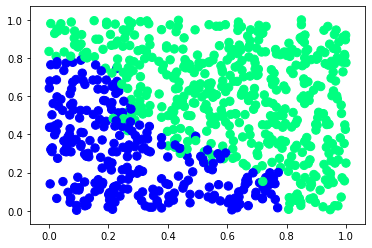

In [7]:
plt.scatter(X[:,0], X[:,1],c=y,s=70,cmap='winter')

In [8]:
from sklearn.svm import SVC

In [78]:
clf=SVC(kernel='linear', C=100000000)
clf.fit(X,y)     ### high C hard boundaries

SVC(C=100000000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
clf=SVC(kernel='rbf', C=1000, gamma='scale')
clf.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
clf=SVC(kernel='linear', C=1)
     clf.fit(X,y)       ### low C soft boundaries

In [87]:
clf=SVC(kernel='rbf', C=1)
          ### low C soft boundaries

In [88]:
 clf.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
clf.score(X,y)

0.924

In [93]:
np.sum(clf.predict(X)!=y)

57

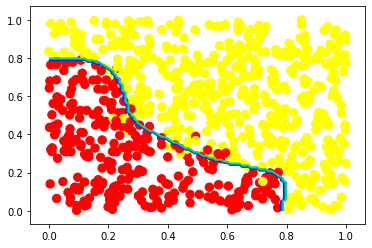

In [11]:
h=.01
x_min=0
x_max=1
y_min=0
y_max=1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap='winter') #play around with cmap options to get different color maps
plt.scatter(X[:,0], X[:,1],c=y,s=70,cmap='autumn')
plt.show()

In [90]:
##Read data
data=np.genfromtxt('testData.csv', delimiter=',', skip_header=1)
data

array([[0.97 , 0.662, 1.   ],
       [0.404, 0.525, 1.   ],
       [0.515, 0.314, 1.   ],
       [0.988, 0.173, 1.   ],
       [0.658, 0.912, 1.   ],
       [0.543, 0.342, 1.   ],
       [0.413, 0.354, 1.   ],
       [0.188, 0.772, 1.   ],
       [0.362, 0.721, 1.   ],
       [0.756, 0.643, 1.   ],
       [0.625, 0.693, 1.   ],
       [0.76 , 0.61 , 1.   ],
       [0.204, 0.192, 0.   ],
       [0.549, 0.247, 1.   ],
       [0.928, 0.558, 1.   ],
       [0.438, 0.225, 0.   ],
       [0.698, 0.973, 1.   ],
       [0.121, 0.298, 0.   ],
       [0.973, 0.289, 1.   ],
       [0.609, 0.207, 0.   ],
       [0.239, 0.705, 1.   ],
       [0.158, 0.317, 0.   ],
       [0.551, 0.349, 1.   ],
       [0.552, 0.934, 1.   ],
       [0.093, 0.795, 0.   ],
       [0.992, 0.273, 1.   ],
       [0.913, 0.122, 1.   ],
       [0.461, 0.677, 1.   ],
       [0.117, 0.38 , 0.   ],
       [0.832, 0.98 , 1.   ],
       [0.498, 0.818, 1.   ],
       [0.717, 0.955, 1.   ],
       [0.509, 0.805, 1.   ],
       [0.

In [97]:
data.shape

(249, 3)

In [98]:
X=data[:,range(2)]
X

array([[0.97 , 0.662],
       [0.404, 0.525],
       [0.515, 0.314],
       [0.988, 0.173],
       [0.658, 0.912],
       [0.543, 0.342],
       [0.413, 0.354],
       [0.188, 0.772],
       [0.362, 0.721],
       [0.756, 0.643],
       [0.625, 0.693],
       [0.76 , 0.61 ],
       [0.204, 0.192],
       [0.549, 0.247],
       [0.928, 0.558],
       [0.438, 0.225],
       [0.698, 0.973],
       [0.121, 0.298],
       [0.973, 0.289],
       [0.609, 0.207],
       [0.239, 0.705],
       [0.158, 0.317],
       [0.551, 0.349],
       [0.552, 0.934],
       [0.093, 0.795],
       [0.992, 0.273],
       [0.913, 0.122],
       [0.461, 0.677],
       [0.117, 0.38 ],
       [0.832, 0.98 ],
       [0.498, 0.818],
       [0.717, 0.955],
       [0.509, 0.805],
       [0.273, 0.29 ],
       [0.835, 0.288],
       [0.98 , 0.714],
       [0.244, 0.346],
       [0.551, 0.442],
       [0.384, 0.256],
       [0.922, 0.479],
       [0.508, 0.202],
       [0.879, 0.539],
       [0.864, 0.933],
       [0.2

In [99]:
y=data[:,2]
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

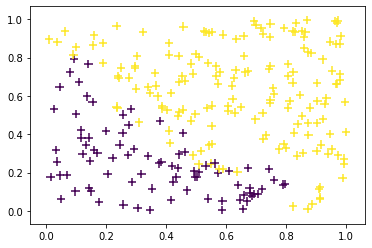

In [100]:
plt.scatter(X[:,0], X[:,1],c=y,s=70,marker='+')

In [101]:
from sklearn.svm import SVC

In [102]:
clf=SVC(kernel='linear', C=100000000)
clf.fit(X,y)     ### high C hard boundaries

SVC(C=100000000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
clf.score(X,y)

0.9116465863453815

In [104]:
np.sum(clf.predict(X)!=y)

22

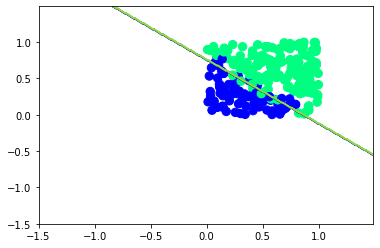

In [106]:
h=.01
x_min=-1.5
x_max=1.5
y_min=-1.5
y_max=1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z) #play around with cmap options to get different color maps
plt.scatter(X[:,0], X[:,1],c=y,s=70,cmap='winter')
plt.show()